In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import sklearn
import scipy.cluster.hierarchy as sch
# KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import accuracy_score


In [48]:
dataset = pd.read_csv('input/Mall_Customers.csv')

In [49]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
dataset['Gender'] = dataset['Gender']=='Male'
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,True,19,15,39
1,2,True,21,15,81
2,3,False,20,16,6
3,4,False,23,16,77
4,5,False,31,17,40


In [51]:
def elbow(x):
    wcss = []
    for i in range(1, 11):
        km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
        km.fit(x)
        wcss.append(km.inertia_)
        
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method', fontsize = 20)
    plt.xlabel('No. of Clusters')
    plt.ylabel('wcss')
    plt.show()

In [52]:
def km_algo(x,n_clus,col1,col2):
    colors = ['pink','yellow','cyan','magenta','orange']

    km = KMeans(n_clusters = n_clus, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    y_means = km.fit_predict(x)
    
    for it in range(n_clus):
        plt.scatter(x[y_means == it, 0], x[y_means == it, 1], s = 100, c = colors[it])

    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' )

    plt.style.use('fivethirtyeight')
    plt.title('K Means Clustering', fontsize = 20)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.grid()
    plt.show()
    return y_means

In [53]:
def hc_algo(x,n_clus,col1,col2):
    colors = ['pink','yellow','cyan','magenta','orange']
    hc = AgglomerativeClustering(n_clusters = n_clus, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(x)
    

    for it in range(n_clus):
        plt.scatter(x[y_hc == it, 0], x[y_hc == it, 1], s = 100, c = colors[it])
    
    plt.style.use('fivethirtyeight')
    plt.title('Hierarchial Clustering', fontsize = 20)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.grid()
    plt.show()
    return y_hc

In [54]:
from itertools import combinations
columns_name = dataset.columns.tolist()
columns_name = columns_name[2:]
columns_comb = list(combinations(columns_name,2))

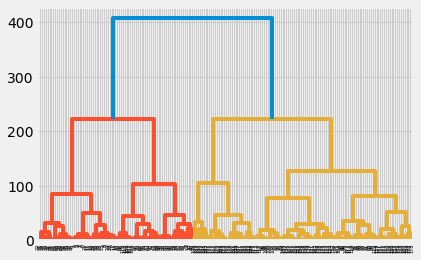

In [55]:
x = dataset[list(columns_comb[0])].values
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

C:\Users\robyb\anaconda3\envs\kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


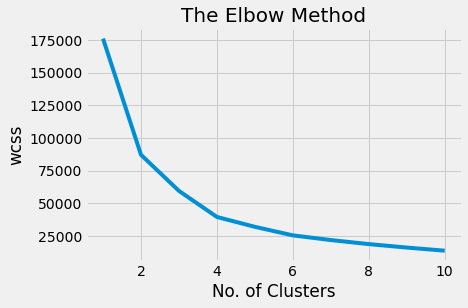

In [56]:
elbow(x)

No handles with labels found to put in legend.


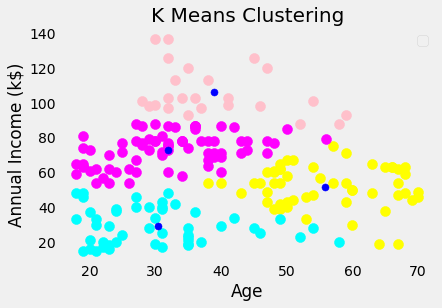

In [57]:
km_y_pred = km_algo(x,4,*columns_comb[0])

No handles with labels found to put in legend.


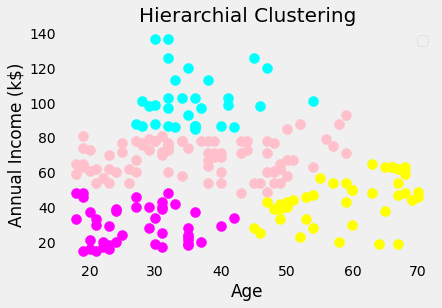

In [58]:
hc_y_pred=hc_algo(x,4,*columns_comb[0])

In [60]:
accuracy_score(km_y_pred,hc_y_pred)

0.185

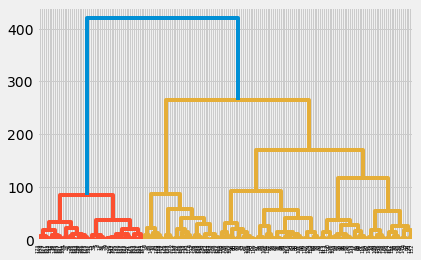

In [61]:
x = dataset[list(columns_comb[1])].values
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

C:\Users\robyb\anaconda3\envs\kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


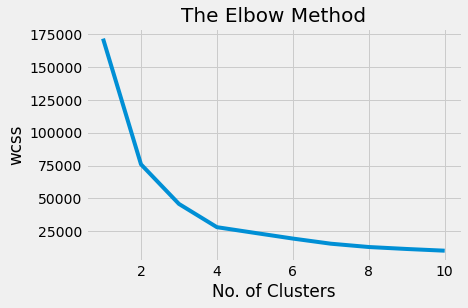

In [62]:
elbow(x)

No handles with labels found to put in legend.


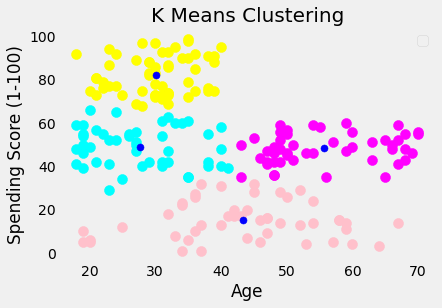

In [63]:
km_y_pred = km_algo(x,4,*columns_comb[1])

No handles with labels found to put in legend.


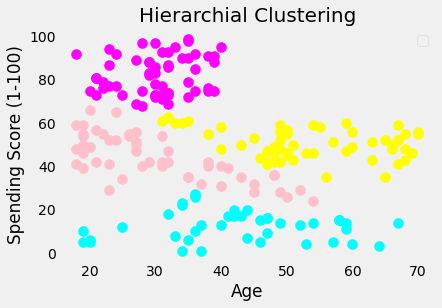

In [64]:
hc_y_pred = hc_algo(x,4,*columns_comb[1])

In [65]:
accuracy_score(km_y_pred,hc_y_pred)

0.04

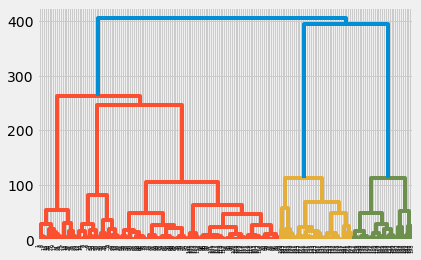

In [66]:
x = dataset[list(columns_comb[2])].values
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

C:\Users\robyb\anaconda3\envs\kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


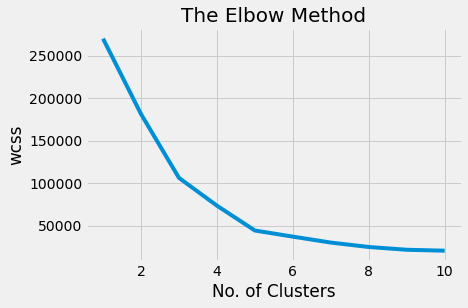

In [67]:
elbow(x)

No handles with labels found to put in legend.


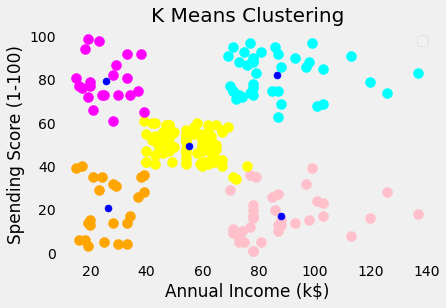

In [68]:
km_y_pred =km_algo(x,5,*columns_comb[2])

No handles with labels found to put in legend.


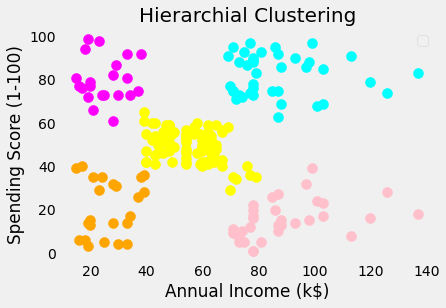

In [69]:
hc_y_pred = hc_algo(x,5,*columns_comb[2])


In [70]:
accuracy_score(km_y_pred,hc_y_pred)

0.98